In [1]:
import pandas  as pd
import numpy as np
import pickle
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

import seaborn as sns

### The problem at hand is to develop and deploy a web application that employs Python and machine learning to address the issue of predicting diabetes risk. We aim to explore and implement an effective solution for diabetes risk prediction through this project.

In [2]:
df = pd.read_csv('diabetes.csv')
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [3]:
df.shape

(768, 9)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [5]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [6]:
'''
min values = 0 for columns Glucose  BloodPressure   SkinThickness  Insulin  BMI
which is not True as every element has a threshold value and cannot be 0.

Pregnancies  have a discrete data

No missing values

'''

'\nmin values = 0 for columns Glucose  BloodPressure   SkinThickness  Insulin  BMI\nwhich is not True as every element has a threshold value and cannot be 0.\n\nPregnancies  have a discrete data\n\nNo missing values\n\n'

### Lets treat 0 values first

In [7]:
df['Glucose'] = df['Glucose'].replace(0, df['Glucose'].mean())
df['BloodPressure'] = df['BloodPressure'].replace(0, df['BloodPressure'].mean())
df['SkinThickness'] = df['SkinThickness'].replace(0, df['SkinThickness'].mean())
df['Insulin'] = df['Insulin'].replace(0,df['Insulin'].mean())
df['BMI'] = df['BMI'].replace(0,df['BMI'].mean())

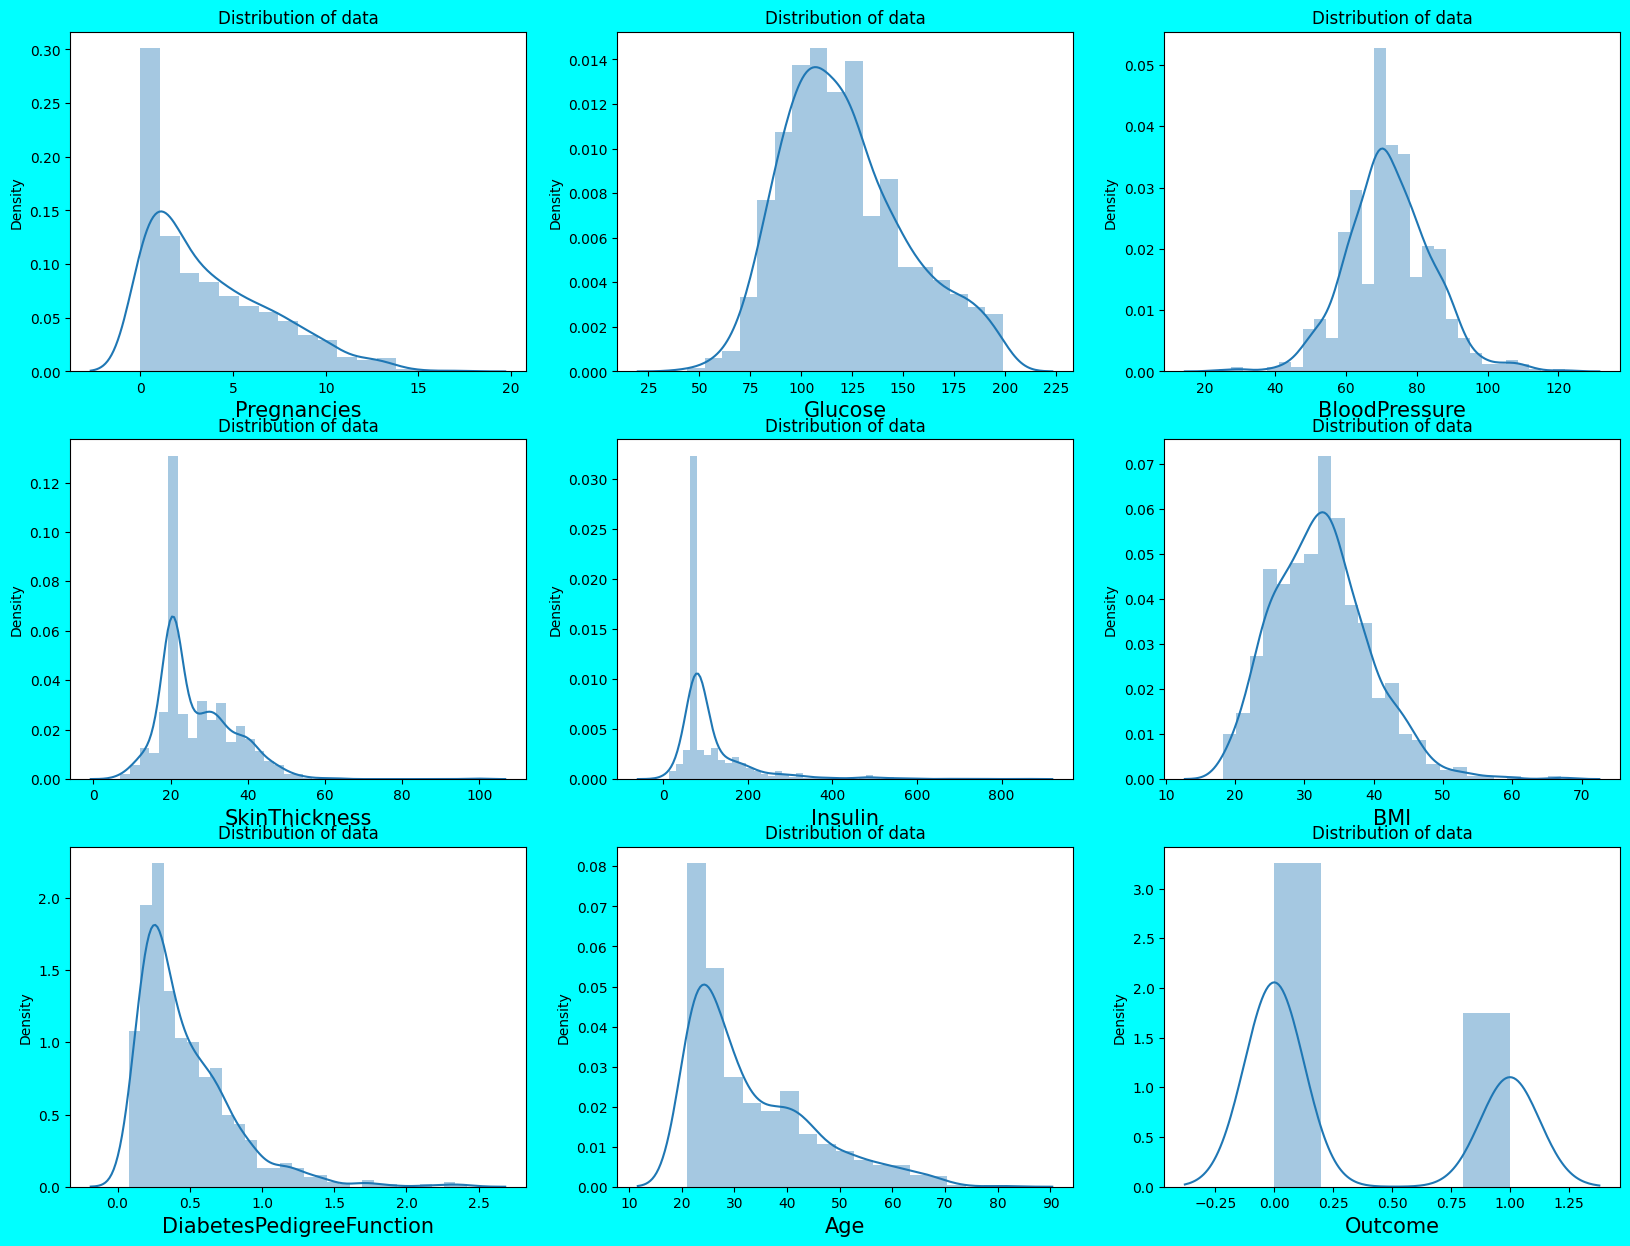

In [8]:
# Lets see how data is distributed for every column
plt.figure(figsize = (20,15), facecolor='cyan')
plotnumber = 1

for columns in df:
    if plotnumber <=9:
        ax=plt.subplot(3,3,plotnumber)
        sns.distplot(df[columns])
        plt.xlabel(columns, fontsize=15)
        plt.title('Distribution of data')
        
    plotnumber+=1
plt.show()


In [9]:
# Lets separate feature and label from the data set
X= df.drop(columns=['Outcome'],axis=1)
y= df['Outcome']

### Lets visualize box plot for outiers

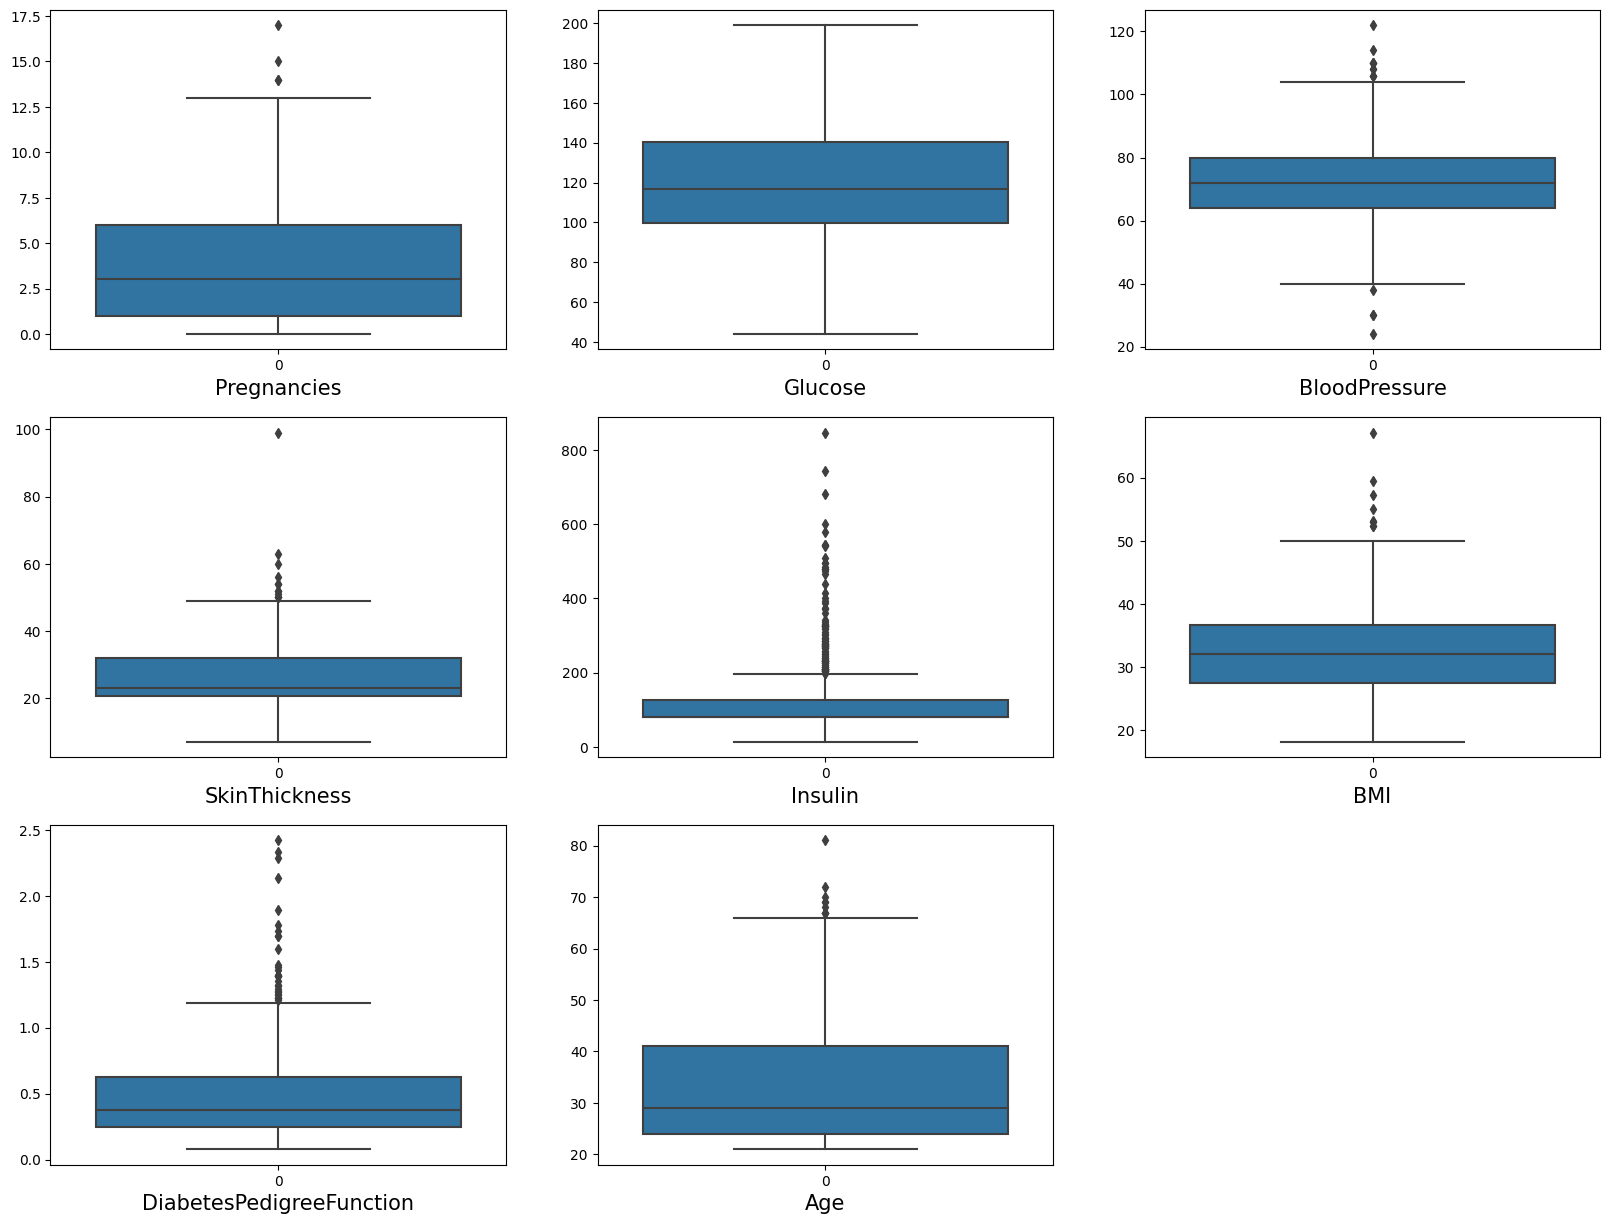

In [10]:
plt.figure(figsize = (20,15))
plotnumber = 1

for columns in X:
    if plotnumber <=9:
        ax=plt.subplot(3,3,plotnumber)
        sns.boxplot(X[columns])
        plt.xlabel(columns, fontsize=15)
        
        
    plotnumber+=1
plt.show()

In [11]:
''''
Glucose has normal distribution data

BloodPressure has Higherside Outliers and Lowerside Outliers

'''

"'\nGlucose has normal distribution data\n\nBloodPressure has Higherside Outliers and Lowerside Outliers\n\n"

### Eliminate outliers by using Z statistics

In [12]:
from scipy.stats import zscore

In [13]:
z_score = zscore(df[['Pregnancies','BloodPressure','SkinThickness','Insulin','BMI','DiabetesPedigreeFunction','Age']])
abs_z_score = np.abs(z_score)

filtering_data = (abs_z_score < 3).all(axis=1) # threshold is often associated with a confidence interval from a normal distribution.

df= df[filtering_data]


In [14]:
X.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,121.681605,72.254807,26.606479,118.660163,32.450805,0.471876,33.240885
std,3.369578,30.436016,12.115932,9.631241,93.080358,6.875374,0.331329,11.760232
min,0.000000,44.000000,24.000000,7.000000,14.000000,18.200000,0.078000,21.000000
25%,1.000000,99.750000,64.000000,20.536458,79.799479,27.500000,0.243750,24.000000
50%,3.000000,117.000000,72.000000,23.000000,79.799479,32.000000,0.372500,29.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000


In [15]:
'''
min values and max values are reasonable now as we removed outliers to some extent

'''

'\nmin values and max values are reasonable now as we removed outliers to some extent\n\n'

In [16]:
X.head(5)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148.0,72.0,35.000000,79.799479,33.6,0.627,50
1,1,85.0,66.0,29.000000,79.799479,26.6,0.351,31
2,8,183.0,64.0,20.536458,79.799479,23.3,0.672,32
3,1,89.0,66.0,23.000000,94.000000,28.1,0.167,21
4,0,137.0,40.0,35.000000,168.000000,43.1,2.288,33


### Finding relationship of independent variables with dependent variable

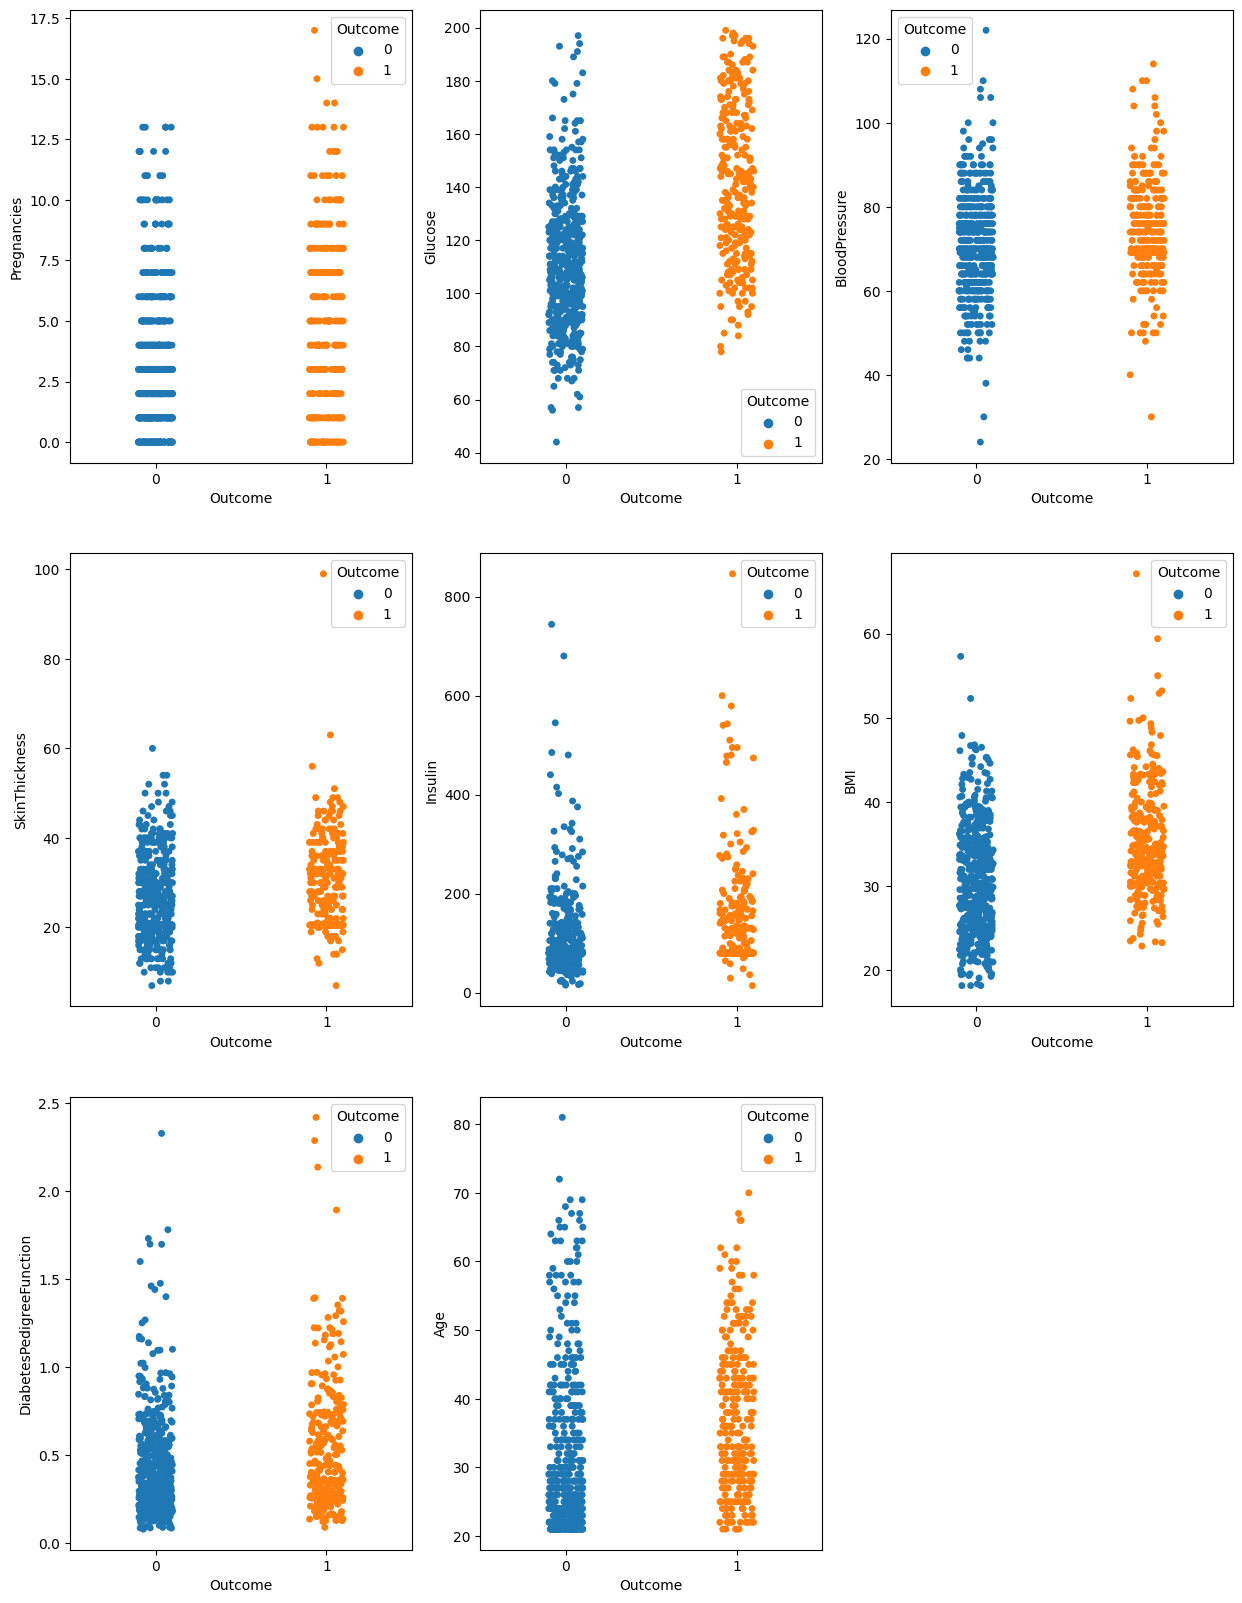

In [17]:
plt.figure(figsize = (15,20))
plotnumber = 1

for columns in X:
    if plotnumber <=9:
        ax=plt.subplot(3,3,plotnumber)
        sns.stripplot(y=X[columns],x=y,hue=y)
            
    plotnumber+=1
plt.show()

In [18]:
from sklearn.preprocessing import StandardScaler

In [19]:
scaler = StandardScaler()
x_scaled = scaler.fit_transform(X)

In [20]:
x_scaled.shape[1]  

8

### Check for Multicollinearity

In [21]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, roc_auc_score,classification_report

In [22]:
vif=pd.DataFrame()        
vif['vif']=[variance_inflation_factor(x_scaled,i) for i in range(x_scaled.shape[1])] 
vif['Features'] =X.columns  


vif

,vif,Features
0,1.431075,Pregnancies
1,1.347308,Glucose
2,1.247914,BloodPressure
3,1.450510,SkinThickness
4,1.262111,Insulin
5,1.550227,BMI
6,1.058104,DiabetesPedigreeFunction
7,1.605441,Age


In [23]:
from sklearn.model_selection import train_test_split

In [24]:
x_train,x_test,y_train,y_test = train_test_split(x_scaled,y,test_size = 0.25, random_state=100)

### Model Confidence

In [25]:
def metric_score(clf,x_train,x_test,y_train,y_test,train =True):
    if train:
        y_pred = clf.predict(x_train)
        print('\n =============Train Result===========')
        print(f'Accuracy Score : {accuracy_score(y_train,y_pred) * 100:.2f}%')
        
    elif train == False:
        pred = clf.predict(x_test)
        print('\n ===================Test Result=====================')
        print(f'Accuracy Score : {accuracy_score(y_test,pred)*100:.2f}%')
            
        print('\n \n Test Classification Report \n', classification_report(y_test,pred,digits=2))           
    

In [26]:
from sklearn.ensemble import RandomForestClassifier

In [27]:
classifier = RandomForestClassifier(n_estimators =20)
classifier.fit(x_train,y_train)

RandomForestClassifier(n_estimators=20)

In [28]:
metric_score(classifier,x_train,x_test,y_train,y_test,train =True)
metric_score(classifier,x_train,x_test,y_train,y_test,train =False)


 =============Train Result===========
Accuracy Score : 99.13%

 ===================Test Result=====================
Accuracy Score : 69.79%

 
 Test Classification Report 
               precision    recall  f1-score   support

           0       0.74      0.83      0.79       127
           1       0.57      0.43      0.49        65

    accuracy                           0.70       192
   macro avg       0.66      0.63      0.64       192
weighted avg       0.68      0.70      0.69       192



### HyperParameter Tuning

In [29]:
from sklearn.model_selection import GridSearchCV

In [30]:
# RandomForestClassifier

params = {'n_estimators':[13,15],             
          'criterion':['entropy','gini'],
          'max_depth':[10,15],
          'min_samples_split':[10,11],
          'min_samples_leaf':[5,6]}

grd = GridSearchCV(classifier,param_grid=params)
grd.fit(x_train,y_train)

print('best params :', grd.best_params_) 

best params : {'criterion': 'entropy', 'max_depth': 10, 'min_samples_leaf': 6, 'min_samples_split': 11, 'n_estimators': 13}


In [31]:
calssifier = grd.best_estimator_    # reinstiating with best parameters
calssifier.fit(x_train,y_train)

RandomForestClassifier(criterion='entropy', max_depth=10, min_samples_leaf=6,
                       min_samples_split=11, n_estimators=13)

In [32]:
metric_score(classifier,x_train,x_test,y_train,y_test, train=True)  # This is for training score

metric_score(classifier,x_train,x_test,y_train,y_test, train=False) # This is for testing score


 =============Train Result===========
Accuracy Score : 99.13%

 ===================Test Result=====================
Accuracy Score : 69.79%

 
 Test Classification Report 
               precision    recall  f1-score   support

           0       0.74      0.83      0.79       127
           1       0.57      0.43      0.49        65

    accuracy                           0.70       192
   macro avg       0.66      0.63      0.64       192
weighted avg       0.68      0.70      0.69       192

